In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
conv_base.trainable = False

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        './test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)

C:\Users\HP\anaconda3\envs\lokesh\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 2293s 4s/step - accuracy: 0.8156 - loss: 0.4628 - val_accuracy: 0.9076 - val_loss: 0.2187


In [12]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images (relative to the current working directory)
dog_folder = "./test/dogs"  # Replace 'images' with the name of your folder
cat_folder = "./test/cats"


# Get a list of all files in the directory
dog_files = [f for f in os.listdir(dog_folder) if os.path.isfile(os.path.join(dog_folder, f))]
cat_files = [f for f in os.listdir(cat_folder) if os.path.isfile(os.path.join(cat_folder, f))]

# Filter out non-image files (optional)
# image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display the images
# for image_file in image_files:
#     image_path = os.path.join(image_folder, image_file)
#     img = Image.open(image_path)
#     plt.imshow(img)
#     plt.title(image_file)
#     plt.axis('off')  # Hide the axis
#     plt.show()
# print(dog_files)

def showw(file,folder):
    image_path = os.path.join(folder,file)
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

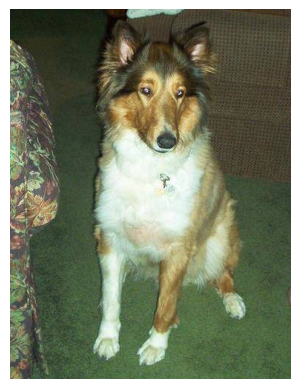

In [14]:
showw(dog_files[100],dog_folder)

In [15]:
def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1] range
    return img_array


In [21]:
def predict_it(image_file,folder):
    image_path = os.path.join(folder,image_file)
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    if prediction>0.5:
        result = "dog"
    else:
        result = "cat"
    return result

In [22]:
predict_it(dog_files[0],dog_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


'dog'

In [23]:
predict_it(cat_files[10],cat_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'cat'